In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from nim.models import Net, generate
from utils import count_arrival

In [21]:
def f(t, a, b, c, d, e):
    return a * np.float_power(b * t + c, -d) + e

In [79]:
xtrain = np.load("train.npy")
print(xtrain.sum(axis=1).mean())
params = np.load("params.npy")
t_new = np.arange(400)

# params[0] = 1

mean_fit = f(t_new, *params)

99.61508580500185


In [80]:
net = Net.load_from_checkpoint("model.ckpt")
decoder = net.decoder
n, t = 4000, 400
x = generate(decoder, size=(n, t))
x = x.numpy().reshape(n, t)

In [81]:
y = x + mean_fit
y = np.exp(y)

In [82]:
t, rate = count_arrival(y, 0.2, max_=150)
rate = rate.mean(axis=0)
true_rate = 0.5 * np.sin(np.pi / 5 * t) + 0.02 * t + 1

Text(0, 0.5, 'Rate')

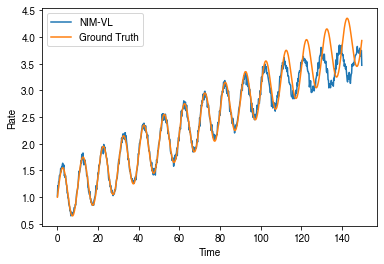

In [83]:
plt.plot(t, rate, label="NIM-VL")
plt.plot(t, true_rate, label="Ground Truth")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Rate")